In [1]:
from GA import *
from Problems import *
from utils import *
from PSO import *
import matplotlib.pyplot as plt

In [2]:
sphere = problems.FunctionFactory.select_function("sphere", 2)

In [3]:
a = ParticleFactory(sphere)

In [4]:
Swarm(10, a)

In [2]:
a = PSO("sphere")

In [3]:
a.run()

AttributeError: 'str' object has no attribute 'get_nvar'

In [ ]:
a = Population("sphere", n_var = 2 , config_file="inputs/params_g1.cfg", penalty=False)

In [3]:
a.evolve("DE")

In [4]:
df = functions.dict_to_dataframe(a.generation_statistics)

In [5]:
a.best_chromosome.genes >= a.objective_function.get_xmin()

array([ True,  True])

In [6]:
a.best_chromosome.genes <= a.objective_function.get_xmax()

array([ True,  True])

In [7]:
a.objective_function.evaluate(a.best_chromosome.genes)

3.373680368434947e-05

In [8]:
a.objective_function.penalty_exp

6.0

In [9]:
a.best_chromosome.return_fitness()

(3.373680368434947e-05, 0, 0, 0)

In [10]:
df

,best_fitness,best_fitness_with_penalty,weighted_penalty,unweighted_penalty,num_violations
Generation,,,,,
1,0.071849,0.071849,0,0,0
2,0.020886,0.020886,0,0,0
3,0.020886,0.020886,0,0,0
4,0.015310,0.015310,0,0,0
5,0.015310,0.015310,0,0,0
...,...,...,...,...,...
246,0.000034,0.000034,0,0,0
247,0.000034,0.000034,0,0,0
248,0.000034,0.000034,0,0,0


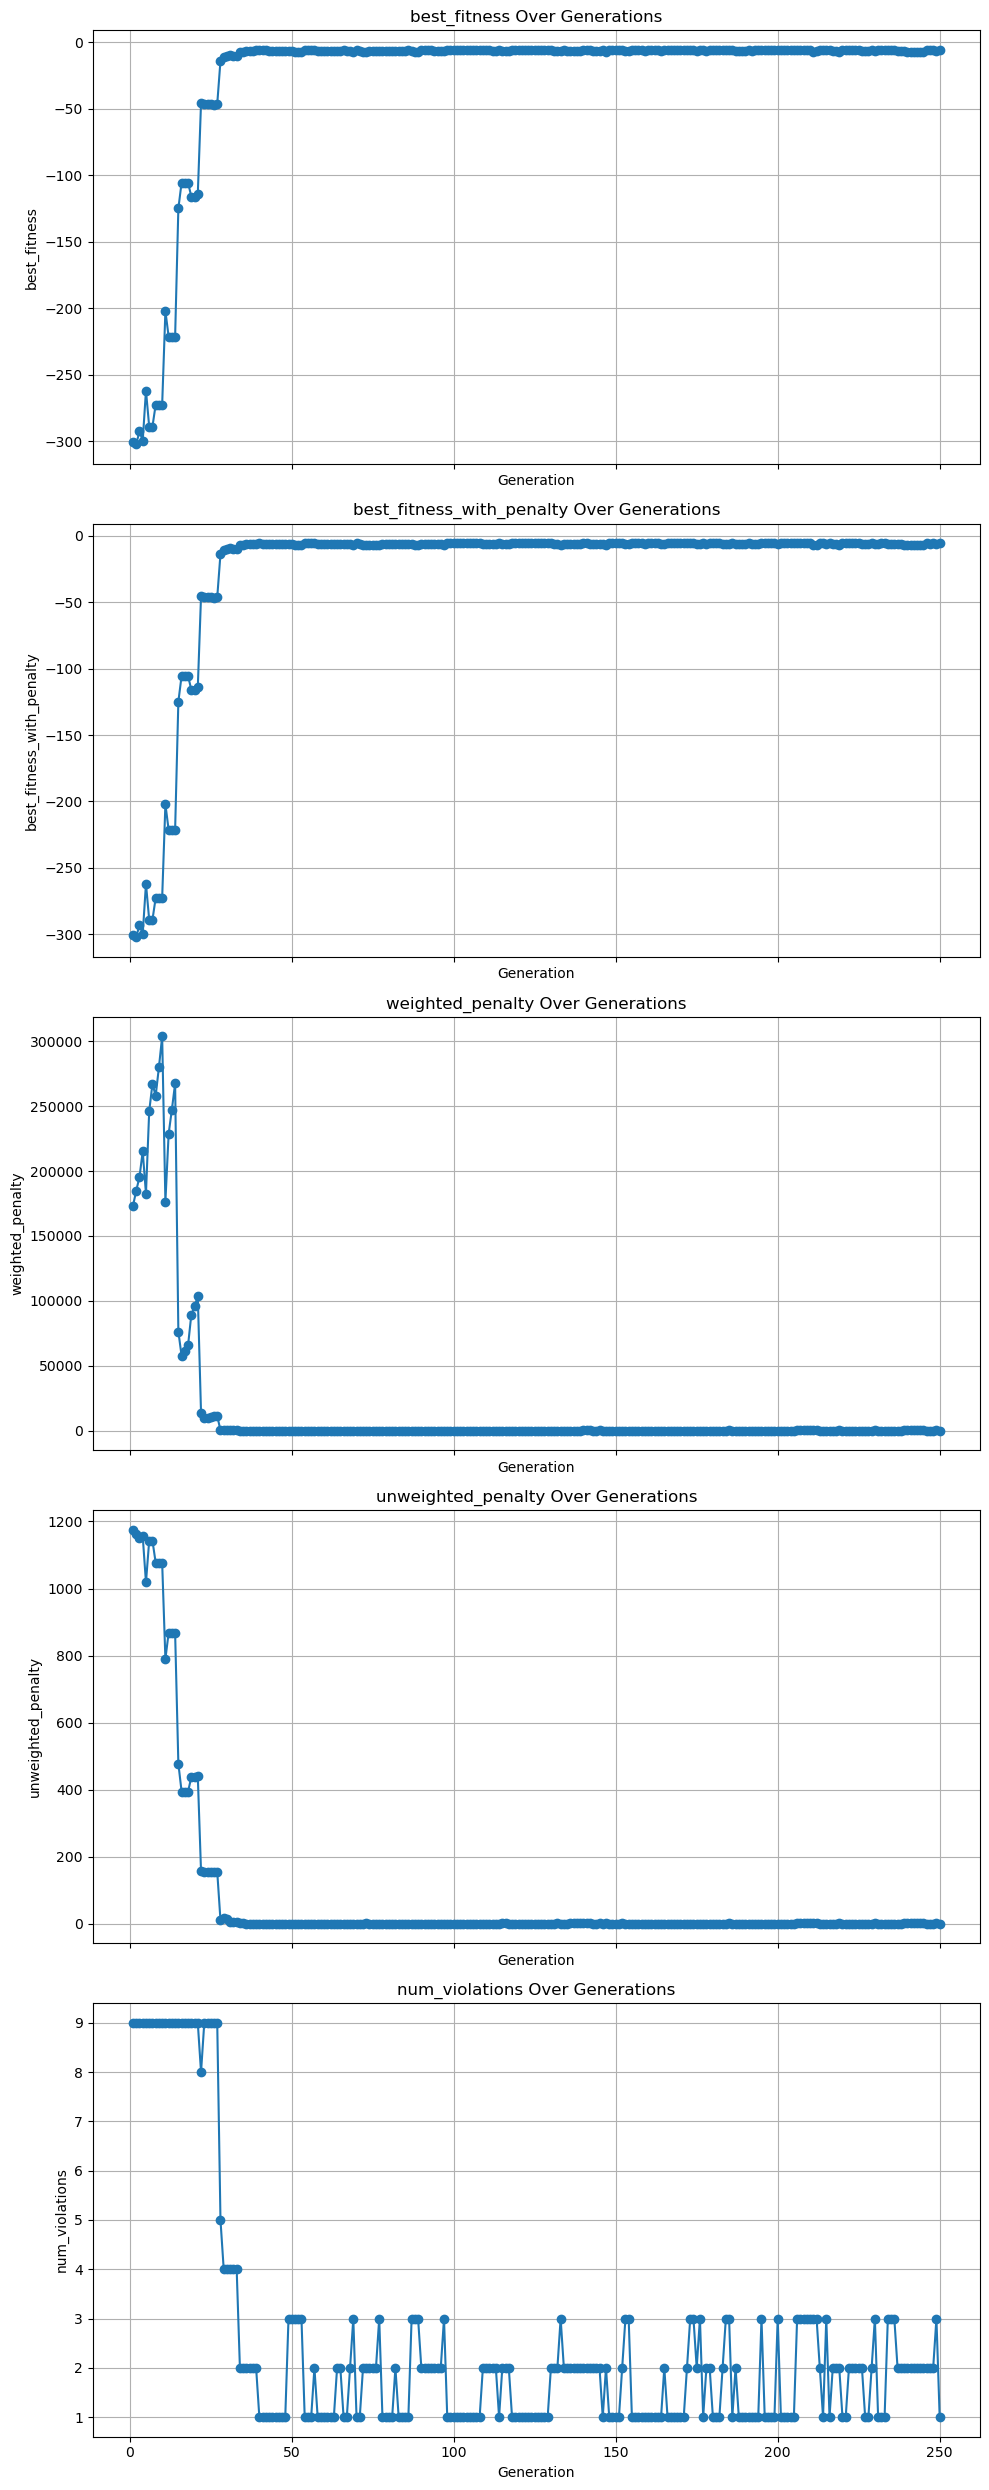

In [11]:
plot_columns(df)

In [42]:
a.best_chromosome.genes < a.objective_function.get_xmin()

array([False, False, False, False])

In [43]:
a.best_chromosome.genes > a.objective_function.get_xmax()

array([False, False, False, False])

In [44]:
a.best_chromosome.genes

array([ 1.19528989e+03,  0.00000000e+00, -2.58670997e-01, -5.46241208e-01])

In [ ]:
test_problems = ["G1", "G4", "G5", "G6"]
results = {problem: {"DE": [], "GA": []} for problem in test_problems} 
num_violations = {problem: {"DE": [], "GA": []} for problem in test_problems} 

for test_problem in test_problems:
    for i in range(5):
        a = Population(test_problem)
        a.evolve("DE")
        b = functions.dict_to_dataframe(a.generation_statistics)
        results[test_problem]["DE"].append(b["best_fitness"].iloc[-1])
        num_violations[test_problem]["DE"].append(b["number_violations"].iloc[-1])
    
    for i in range(5):
        a = Population(test_problem)
        a.evolve("GA")
        b = functions.dict_to_dataframe(a.generation_statistics)
        results[test_problem]["GA"].append(b["best_fitness"].iloc[-1])
        num_violations[test_problem]["GA"].append(b["number_violations"].iloc[-1])

In [ ]:
functions.compare_algorithms(results, 0.05)

{'G1': {'DE vs GA': {'statistic': -2.6111648393354674,
   'p_value': 0.009023438818080326,
   'conclusion': 'DE outperforms GA'}},
 'G4': {'DE vs GA': {'statistic': 1.5666989036012806,
   'p_value': 0.11718508719813801,
   'conclusion': 'No significant difference'}},
 'G5': {'DE vs GA': {'statistic': 1.9844852778949553,
   'p_value': 0.04720176769014221,
   'conclusion': 'GA outperforms DE'}},
 'G6': {'DE vs GA': {'statistic': 1.775592090748118,
   'p_value': 0.07580017458236125,
   'conclusion': 'No significant difference'}}}

In [ ]:
num_violations

{'G1': {'DE': [9, 9, 9, 9, 9], 'GA': [9, 9, 9, 9, 9]},
 'G4': {'DE': [6, 6, 6, 6, 6], 'GA': [6, 6, 6, 6, 6]},
 'G5': {'DE': [6, 6, 6, 6, 6], 'GA': [6, 6, 6, 6, 6]},
 'G6': {'DE': [1, 1, 1, 2, 1], 'GA': [2, 1, 1, 1, 2]}}

In [ ]:
a.evolve("DE")

In [ ]:
a.evolve("GA")

In [ ]:
a.best_chromosome.calculate_fitness()

In [ ]:
b = functions.dict_to_dataframe(a.generation_statistics)

In [ ]:
b["best_fitness"].iloc[-1]

57.503794558394375

In [ ]:
a.evolve()

4

In [ ]:
for i in range(a.pop_size):
    print(a.chromosomes[i].genes)

[90.33401053 64.61322927]
[17.69069256 64.82750429]
[17.71205209 36.99073275]
[35.43228435 11.15560026]


In [ ]:
for i in range(a.pop_size):
    print(a.chromosomes[i].fitness)

612526.8955206232
92352.57606645417
5902.534311824702
16168.46046834587


In [ ]:
for i in range(a.pop_size):
    a.chromosomes[i].calculate_fitness()
    print(a.chromosomes[i].fitness)

620993.4174686676
95259.13011571343
6764.749628837317
16825.533089372275


In [ ]:
a.generation_t

3

In [ ]:
a.get_population_statistics()

(6549.195799584164, 184154.93482968872, 253285.0168583821)

In [ ]:
a.binomial_crossover_and_selection()

In [ ]:
a.tournament_selection(q=1)

In [ ]:
a.sbx_and_pbm()

In [ ]:
for c in b:
    print(c.fitness) 

15.804508093893453
3.454327341743649
2.586957486130423
3.454327341743649
3.454327341743649


In [ ]:
print(a.fitness)

0.6714053969469278


In [ ]:
a.parameter_based_mutation()

In [ ]:
a.genes

array([ 0.35317455, -0.73937347])

In [ ]:
a.polynomial_mutation()